<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Summarizing" data-toc-modified-id="Summarizing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summarizing</a></span><ul class="toc-item"><li><span><a href="#Representatives" data-toc-modified-id="Representatives-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Representatives</a></span></li><li><span><a href="#CheckM" data-toc-modified-id="CheckM-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CheckM</a></span></li></ul></li><li><span><a href="#Selecting-the-best-rep-per-GTDB-species" data-toc-modified-id="Selecting-the-best-rep-per-GTDB-species-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Selecting the best rep per GTDB species</a></span><ul class="toc-item"><li><span><a href="#Creating-unique-org.-names" data-toc-modified-id="Creating-unique-org.-names-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating unique org. names</a></span></li><li><span><a href="#Summarizing-filtered" data-toc-modified-id="Summarizing-filtered-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Summarizing filtered</a></span></li><li><span><a href="#Writing-filtered-metadata-table" data-toc-modified-id="Writing-filtered-metadata-table-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Writing filtered metadata table</a></span></li><li><span><a href="#Filtering-by-checkM" data-toc-modified-id="Filtering-by-checkM-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Filtering by checkM</a></span></li></ul></li><li><span><a href="#Selecting-the-best-rep-per-NCBI-spec-level-taxID" data-toc-modified-id="Selecting-the-best-rep-per-NCBI-spec-level-taxID-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Selecting the best rep per NCBI spec-level taxID</a></span><ul class="toc-item"><li><span><a href="#Creating-unique-org.-names" data-toc-modified-id="Creating-unique-org.-names-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Creating unique org. names</a></span></li><li><span><a href="#Summarizing-filtered" data-toc-modified-id="Summarizing-filtered-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Summarizing filtered</a></span><ul class="toc-item"><li><span><a href="#CheckM" data-toc-modified-id="CheckM-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>CheckM</a></span></li><li><span><a href="#Assemblies" data-toc-modified-id="Assemblies-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Assemblies</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Species-level" data-toc-modified-id="Species-level-7.2.3.1"><span class="toc-item-num">7.2.3.1&nbsp;&nbsp;</span>Species level</a></span></li><li><span><a href="#Genus-level" data-toc-modified-id="Genus-level-7.2.3.2"><span class="toc-item-num">7.2.3.2&nbsp;&nbsp;</span>Genus level</a></span></li></ul></li></ul></li><li><span><a href="#Writing-filtered-metadata-table" data-toc-modified-id="Writing-filtered-metadata-table-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Writing filtered metadata table</a></span></li><li><span><a href="#Filtering-by-CheckM" data-toc-modified-id="Filtering-by-CheckM-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Filtering by CheckM</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Writing-filtered-metadata-table" data-toc-modified-id="Writing-filtered-metadata-table-7.4.0.1"><span class="toc-item-num">7.4.0.1&nbsp;&nbsp;</span>Writing filtered metadata table</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Next-steps" data-toc-modified-id="Next-steps-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Next steps</a></span></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li><li><span><a href="#debug" data-toc-modified-id="debug-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>debug</a></span></li></ul></div>

# Goal

* Summarize GTDB metadata 
* The data will be used to select which genomes will be used for the `llmgp-db` pipeline

# Var

In [1]:
work_dir = '/ebio/abt3_projects/databases_no-backup/GTDB/release86/'
bac_metadata_url = 'https://data.ace.uq.edu.au/public/gtdb/release86/bac_metadata_r86.tsv'
arc_metadata_url = 'https://data.ace.uq.edu.au/public/gtdb/release86/arc_metadata_r86.tsv'

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)

set.seed(8473)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



# Load

In [3]:
# reading in metadata
metadata_urls = c(bac_metadata_url, arc_metadata_url)

df = list()
for(url in metadata_urls){
    write(sprintf('Reading in file: %s', url), stderr())
    df[[url]] = fread(url, sep='\t', check.names=TRUE)
}
df = do.call(rbind, df)

df %>% nrow %>% print
df %>% head

[1] 127318


accession,scaffold_count,gc_count,longest_scaffold,gc_percentage,total_gap_length,genome_size,n50_contigs,n50_scaffolds,l50_scaffolds,⋯,ssu_silva_blast_evalue,ssu_silva_blast_perc_identity,lsu_5s_query_id,lsu_5s_length,lsu_5s_contig_len,gtdb_taxonomy,mimag_high_quality,gtdb_cluster_size,gtdb_clustered_genomes,gtdb_type_material
RS_GCF_001245025.1,157,2457823,329958,52.25851,0,4703201,115698,115698,13,⋯,0,100,NZ_LHKW01000019.1,110,45304,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Salmonella;s__Salmonella enterica,f,none,none,f
RS_GCF_000678935.1,4,2880443,3928455,65.59958,6678,4397625,1025092,3928455,1,⋯,0,100,none,none,none,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Mycobacterium;s__Mycobacterium tuberculosis,f,none,none,f
RS_GCF_000020485.1,1,976684,2578146,37.88319,0,2578146,2578146,2578146,1,⋯,0,100,NC_011899.1,110,2578146,d__Bacteria;p__Firmicutes_F;c__Halanaerobiia;o__Halanaerobiales;f__Halothermotrichaceae;g__Halothermothrix;s__Halothermothrix orenii,t,1,RS_GCF_000020485.1,t
RS_GCF_001206855.1,75,837175,119381,39.51367,35,2118732,64912,64913,13,⋯,0,99.935,NZ_CRLU01000016.1,108,45341,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus pneumoniae,t,none,none,f
RS_GCF_001085945.1,76,813113,115001,39.46670,101,2060352,47679,47680,14,⋯,0,99.935,NZ_CKTI01000046.1,108,14629,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus pneumoniae,t,none,none,f
RS_GCF_000659565.1,4,2886094,3927593,65.58749,5261,4405634,762837,3927593,1,⋯,0,100,none,none,none,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Mycobacterium;s__Mycobacterium tuberculosis,f,none,none,f


In [4]:
df %>% colnames %>% print

 [1] "accession"                       "scaffold_count"                 
 [3] "gc_count"                        "longest_scaffold"               
 [5] "gc_percentage"                   "total_gap_length"               
 [7] "genome_size"                     "n50_contigs"                    
 [9] "n50_scaffolds"                   "l50_scaffolds"                  
[11] "contig_count"                    "ambiguous_bases"                
[13] "longest_contig"                  "l50_contigs"                    
[15] "mean_scaffold_length"            "mean_contig_length"             
[17] "trna_aa_count"                   "trna_selenocysteine_count"      
[19] "trna_count"                      "checkm_completeness"            
[21] "checkm_contamination"            "protein_count"                  
[23] "coding_bases"                    "coding_density"                 
[25] "ssu_count"                       "checkm_marker_count"            
[27] "checkm_marker_lineage"           "checkm_mark

# Summarizing

## Representatives

In [5]:
# number of representatives
df %>%
    filter(gtdb_representative == 't') %>%
    nrow

[1] 28941

In [6]:
# number of representatives per species
df_s = df %>%
    filter(gtdb_representative == 't') %>%
    group_by(gtdb_taxonomy) %>%
    summarize(n=n()) %>%
    ungroup() 

df_s$n %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.778   2.000 218.000 


In [7]:
# assessing these multi-rep per species genomes
df_s %>%
    filter(n >= 2) %>%
    head(n=30)

gtdb_taxonomy,n
d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Altiarchaeum;s__Altiarchaeum sp1,8
d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__IMC4;f__WOR-SM1-SCG;g__WOR-SM1-SCG;s__,2
d__Archaea;p__Asgardarchaeota;c__Heimdallarchaeia;o__UBA460;f__UBA460;g__UBA460;s__,2
d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;o__Thorarchaeales;f__Thorarchaeaceae;g__SMTZ1-45;s__,2
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__40CM-2-53-6;f__40CM-2-53-6;g__40CM-2-53-6;s__,4
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__40CM-2-53-6;f__40CM-2-53-6;g__40CM-2-53-6;s__40CM-2-53-6 sp,3
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__B26-1;f__B26-1;g__B26-1;s__,3
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__B26-1;f__UBA233;g__UBA11855;s__UBA11855 sp1,2
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__B26-1;f__UBA233;g__UBA233;s__,2
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__TCS64;f__TCS64;g__RBG-16-57-9;s__RBG-16-57-9 sp1,2


In [8]:
# number of representatives per species
df_s = df %>%
    filter(gtdb_representative == 't') %>%
    group_by(ncbi_species_taxid) %>%
    summarize(n=n()) %>%
    ungroup() 

df_s$n %>% summary %>% print

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    1.000    1.336    1.000 1719.000 


In [9]:
# number of representatives per species
df_s = df %>%
    filter(gtdb_representative == 't') %>%
    group_by(ncbi_species_taxid) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    filter(ncbi_species_taxid != 'none')

df_s$n %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.257   1.000 135.000 


## CheckM

In [10]:
df$checkm_completeness %>% summary %>% print
df$checkm_contamination %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.57   99.01   99.53   96.77   99.94  100.00 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    0.040    0.250    0.836    0.740 3196.760 


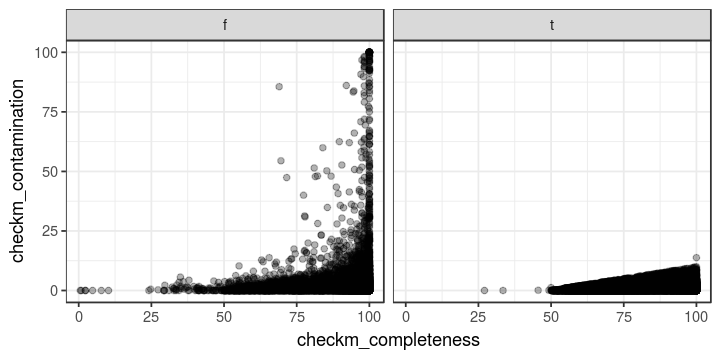

In [11]:
# plotting association
p = df %>%
    filter(checkm_contamination <= 100) %>%
    ggplot(aes(checkm_completeness, checkm_contamination)) +
    geom_point(alpha=0.3) +
    facet_grid(. ~ gtdb_representative) +
    theme_bw()

options(repr.plot.width=6, repr.plot.height=3)
plot(p)

# Selecting the best rep per GTDB species

In [12]:
# filtering out genomes lacking species classifications
df %>%
    filter(gtdb_representative == 't') %>%
    nrow %>% print

df_s = df %>%
    filter(gtdb_representative == 't') %>%
    mutate(SPECIES = gsub('.+;s__', '', gtdb_taxonomy)) %>%
    filter(SPECIES != '') 

df_s %>% nrow %>% print

[1] 28941
[1] 18050


In [13]:
# filtering out UBA genomes
df_s %>% nrow %>% print
df_s = df_s %>%
    filter(!grepl('^UBA[0-9]+$', accession)) 

df_s %>% nrow

[1] 18050


[1] 17170

In [14]:
# ranking based on checkM data
df_s = df_s %>%
    group_by(gtdb_taxonomy) %>%
    mutate(checkm_completeness_rank = min_rank(-checkm_completeness),
           checkm_contamination_rank = min_rank(checkm_contamination),
           summed_rank = min_rank(checkm_completeness_rank + checkm_contamination_rank),
           min_summed_rank = min(summed_rank)) %>%
    ungroup() 

df_s %>% nrow %>% print
df_s %>% head

[1] 17170


accession,scaffold_count,gc_count,longest_scaffold,gc_percentage,total_gap_length,genome_size,n50_contigs,n50_scaffolds,l50_scaffolds,⋯,gtdb_taxonomy,mimag_high_quality,gtdb_cluster_size,gtdb_clustered_genomes,gtdb_type_material,SPECIES,checkm_completeness_rank,checkm_contamination_rank,summed_rank,min_summed_rank
RS_GCF_000020485.1,1,976684,2578146,37.88319,0,2578146,2578146,2578146,1,⋯,d__Bacteria;p__Firmicutes_F;c__Halanaerobiia;o__Halanaerobiales;f__Halothermotrichaceae;g__Halothermothrix;s__Halothermothrix orenii,t,1,RS_GCF_000020485.1,t,Halothermothrix orenii,1,1,1,1
RS_GCF_000468955.1,1,867523,2427048,35.74396,0,2427048,2427048,2427048,1,⋯,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus;s__Lactococcus lactis_B,t,33,GB_GCA_900240855.1;GB_GCA_900240895.1;GB_GCA_900240885.1;RS_GCF_000805435.1;RS_GCF_001591705.1;RS_GCF_000468955.1;GB_GCA_000447925.1;RS_GCF_001622295.1;RS_GCF_000236475.1;RS_GCF_002078955.1;GB_GCA_000447965.1;RS_GCF_001622215.1;GB_GCA_900240865.1;RS_GCF_002078915.1;RS_GCF_001622375.1;GB_GCA_000447845.1;GB_GCA_900240905.1;RS_GCF_001622205.1;RS_GCF_001645365.1;RS_GCF_001622405.1;GB_GCA_000447825.1;RS_GCF_002078375.1;GB_GCA_000447885.1;RS_GCF_002078895.1;RS_GCF_002078935.1;RS_GCF_002441765.1;RS_GCF_001622315.1;RS_GCF_002563595.1;RS_GCF_000534815.1;RS_GCF_001622365.1;RS_GCF_002078765.1;RS_GCF_000014545.1;RS_GCF_000312685.1,f,Lactococcus lactis_B,1,1,1,1
RS_GCF_000347175.1,125,1884499,295179,42.47804,0,4436408,68494,68494,17,⋯,d__Bacteria;p__Spirochaetota;c__Leptospirae;o__Leptospirales;f__Leptospiraceae;g__Leptospira;s__Leptospira alstonii,t,3,RS_GCF_001569445.1;RS_GCF_000347175.1;RS_GCF_001568455.1,t,Leptospira alstonii,1,1,1,1
RS_GCF_000381545.1,51,2169018,627008,41.82851,8199,5193701,194487,212581,7,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Cyclobacteriaceae;g__Rhodonellum;s__Rhodonellum psychrophilum,t,2,RS_GCF_000473765.1;RS_GCF_000381545.1,t,Rhodonellum psychrophilum,1,1,1,1
RS_GCF_000284375.1,1,5861934,9207384,63.66558,0,9207384,9207384,9207384,1,⋯,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae;g__Bradyrhizobium;s__Bradyrhizobium japonicum,t,4,RS_GCF_001038185.1;RS_GCF_000284375.1;RS_GCF_000472985.1;RS_GCF_000773865.1,t,Bradyrhizobium japonicum,1,1,1,1
RS_GCF_000219645.1,1,2676196,4336393,61.86432,10481,4336393,206745,4336393,1,⋯,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae;g__Afipia;s__Afipia clevelandensis,t,1,RS_GCF_000219645.1,f,Afipia clevelandensis,1,1,1,1


In [15]:
# assessing
df_s %>%
    dplyr::select(gtdb_taxonomy, checkm_completeness, checkm_contamination,
                  checkm_completeness_rank, checkm_contamination_rank, 
                  summed_rank, min_summed_rank) %>%
    arrange(gtdb_taxonomy) %>%
    head(n=20)

gtdb_taxonomy,checkm_completeness,checkm_contamination,checkm_completeness_rank,checkm_contamination_rank,summed_rank,min_summed_rank
d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Altiarchaeum;s__Altiarchaeum sp1,86.60,0.93,4,1,3,1
d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Altiarchaeum;s__Altiarchaeum sp1,71.96,0.93,6,1,5,1
d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Altiarchaeum;s__Altiarchaeum sp1,87.31,0.93,3,1,2,1
d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Altiarchaeum;s__Altiarchaeum sp1,95.02,0.93,1,1,1,1
d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Altiarchaeum;s__Altiarchaeum sp1,95.02,1.87,1,6,5,1
d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Altiarchaeum;s__Altiarchaeum sp1,80.06,0.93,5,1,4,1
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__40CM-2-53-6;f__40CM-2-53-6;g__40CM-2-53-6;s__40CM-2-53-6 sp,74.92,1.94,1,2,1,1
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__40CM-2-53-6;f__40CM-2-53-6;g__40CM-2-53-6;s__40CM-2-53-6 sp,73.05,2.80,2,3,3,1
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__40CM-2-53-6;f__40CM-2-53-6;g__40CM-2-53-6;s__40CM-2-53-6 sp,63.27,1.46,3,1,2,1
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__TCS64;f__TCS64;g__RBG-16-57-9;s__RBG-16-57-9 sp1,76.13,0.00,1,1,1,1


In [16]:
# filtering
df_s_f = df_s %>%
    filter(summed_rank == min_summed_rank) %>%
    group_by(gtdb_taxonomy) %>%
    sample_n(1) %>%
    ungroup() %>%
    dplyr::select(-checkm_completeness_rank, -checkm_contamination_rank, 
                  -summed_rank, -min_summed_rank)

df_s_f %>% nrow %>% print
df_s_f %>% head

[1] 11459


accession,scaffold_count,gc_count,longest_scaffold,gc_percentage,total_gap_length,genome_size,n50_contigs,n50_scaffolds,l50_scaffolds,⋯,ssu_silva_blast_perc_identity,lsu_5s_query_id,lsu_5s_length,lsu_5s_contig_len,gtdb_taxonomy,mimag_high_quality,gtdb_cluster_size,gtdb_clustered_genomes,gtdb_type_material,SPECIES
GB_GCA_002785505.1,251,484743,34633,32.45002,5109,1498923,5943,8320,53,⋯,97.109,PEUK01000019.1,106,8675,d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Altiarchaeum;s__Altiarchaeum sp1,f,1,GB_GCA_002785505.1,f,Altiarchaeum sp1
GB_GCA_001915065.1,69,951875,107997,53.26489,217,1787276,30991,32111,17,⋯,85.479,none,none,none,d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__40CM-2-53-6;f__40CM-2-53-6;g__40CM-2-53-6;s__40CM-2-53-6 sp,f,1,GB_GCA_001915065.1,f,40CM-2-53-6 sp
GB_GCA_001775965.1,86,739389,46835,61.17590,7066,1215694,12743,19901,22,⋯,none,MEZG01000055.1,97,31460,d__Archaea;p__Crenarchaeota;c__Bathyarchaeia;o__TCS64;f__TCS64;g__RBG-16-57-9;s__RBG-16-57-9 sp1,f,1,GB_GCA_001775965.1,f,RBG-16-57-9 sp1
RS_GCF_000019605.1,1,779482,1590757,49.00070,0,1590757,1590757,1590757,1,⋯,100,NC_010482.1,114,1590757,d__Archaea;p__Crenarchaeota;c__Korarchaeia;o__Korarchaeales;f__Korarchaeaceae;g__Korarchaeum;s__Korarchaeum cryptofilum,t,2,U_43821;RS_GCF_000019605.1,f,Korarchaeum cryptofilum
GB_GCA_001717035.1,11,943441,429758,57.62637,55,1637224,218786,256139,3,⋯,94.891,MAGT01000010.1,109,429758,d__Archaea;p__Crenarchaeota;c__Methanomethylicia;o__Methanomethyliales;f__Methanomethyliaceae;g__Methanomethylicus;s__Methanomethylicus mesodigestum,t,6,U_66737;GB_GCA_001717035.1;U_43160;GB_GCA_002507395.1;U_2538;U_33798,f,Methanomethylicus mesodigestum
GB_GCA_001717025.1,86,761268,67467,55.38658,14,1374477,23775,24139,17,⋯,94.619,MAGU01000072.1,108,15732,d__Archaea;p__Crenarchaeota;c__Methanomethylicia;o__Methanomethyliales;f__Methanomethyliaceae;g__Methanomethylicus;s__Methanomethylicus oleusabulum,t,5,U_68229;GB_GCA_001717025.1;U_33795;GB_GCA_002504985.1;U_43159,f,Methanomethylicus oleusabulum


## Creating unique org. names

* species names are not unique

In [17]:
# duplicate organism names?
df_s_f %>%
    group_by(ncbi_organism_name) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    filter(n>1) %>%
    nrow

[1] 410

In [18]:
# duplicate organism names?
df_s_f %>%
    group_by(accession, ncbi_organism_name) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    filter(n>1) %>%
    nrow

[1] 0

In [19]:
# ncbi_organism_name = ncbi_organism_name
df_s_f = df_s_f %>%
    unite(ncbi_organism_name, accession, ncbi_organism_name, sep='_', remove=FALSE) 

df_s_f %>%
    group_by(ncbi_organism_name) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    filter(n>1) %>%
    nrow %>% print

df_s_f$ncbi_organism_name %>% head(n=10) %>% print

[1] 0
 [1] "GB_GCA_002785505.1_Candidatus Altiarchaeum sp. CG03_land_8_20_14_0_80_32_618"
 [2] "GB_GCA_001915065.1_archaeon 13_2_20CM_2_53_6"                                
 [3] "GB_GCA_001775965.1_Candidatus Bathyarchaeota archaeon RBG_13_60_20"          
 [4] "RS_GCF_000019605.1_Candidatus Korarchaeum cryptofilum OPF8"                  
 [5] "GB_GCA_001717035.1_Candidatus Methanomethylicus mesodigestum"                
 [6] "GB_GCA_001717025.1_Candidatus Methanomethylicus oleusabulum"                 
 [7] "GB_GCA_001717015.1_Candidatus Methanosuratus petracarbonis"                  
 [8] "GB_GCA_000270325.1_Candidatus Caldiarchaeum subterraneum"                    
 [9] "GB_GCA_000494145.1_Thaumarchaeota archaeon JGI OTU-1"                        
[10] "GB_GCA_000200715.1_Cenarchaeum symbiosum A"                                  


## Summarizing filtered

In [20]:
# number of representatives per species
df_s_f_s = df_s_f %>%
    group_by(gtdb_taxonomy) %>%
    summarize(n=n()) %>%
    ungroup() 

df_s_f_s$n %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 


In [21]:
df_s_f$checkm_completeness %>% summary %>% print
df_s_f$checkm_contamination %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.08   98.28   99.40   96.23   99.89  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.4700  0.8178  1.1000 13.7900 


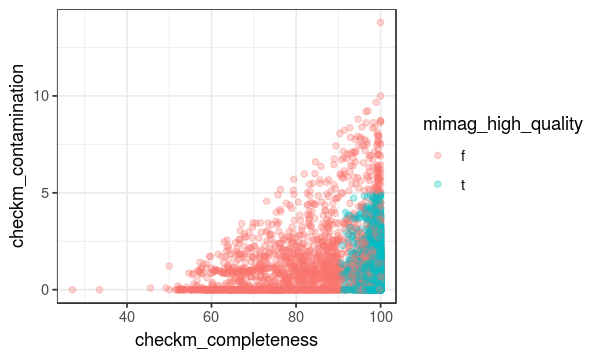

In [22]:
# plotting association
p = df_s_f %>%
    ggplot(aes(checkm_completeness, checkm_contamination, color=mimag_high_quality)) +
    geom_point(alpha=0.3) +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3)
plot(p)

## Writing filtered metadata table

In [23]:
F = file.path(work_dir, 'metadata_1perGTDBSpec.tsv')
write.table(df_s_f, file=F, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release86//metadata_1perGTDBSpec.tsv 


## Filtering by checkM

In [24]:
# all
df_s_f %>% nrow %>% print

# relaxed
df_s_f %>%
    filter(checkm_completeness >= 70,
           checkm_contamination < 10) %>%
    nrow %>% print

# stringent
df_s_f %>%
    filter(checkm_completeness >= 70,
           checkm_contamination < 5) %>%
    nrow %>% print

[1] 11459
[1] 11053
[1] 10904


# Selecting the best rep per NCBI spec-level taxID

In [25]:
# number of representatives per NCBI species taxID
df_s= df %>%
    filter(ncbi_species_taxid != 'none') %>%
    group_by(ncbi_species_taxid) %>%
    summarize(n=n()) %>%
    ungroup() 

df_s$n %>% summary %>% print

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    1.000    4.291    1.000 9767.000 


In [26]:
# number of species taxIDs
df %>%
    filter(gtdb_representative == 't') %>%
    .$ncbi_species_taxid %>% unique %>% length %>% print

# number of NAs/none for species taxIDs
df %>%
    filter(gtdb_representative == 't') %>%
    filter(!is.na(ncbi_species_taxid),
           ncbi_species_taxid != 'none') %>%
    .$ncbi_species_taxid %>% unique %>% length %>% print

df %>% 
   filter(gtdb_representative == 't') %>%
    nrow %>% print
df %>%
    filter(gtdb_representative == 't') %>%
    filter(!is.na(ncbi_species_taxid),
           ncbi_species_taxid != 'none') %>% 
    nrow %>% print

[1] 21657
[1] 21656
[1] 28941
[1] 27222


In [27]:
# filtering out genomes lacking species classifications
df %>%
    filter(gtdb_representative == 't') %>%
    nrow %>% print

df_s = df %>%
    filter(gtdb_representative == 't') %>%
    filter(!is.na(ncbi_species_taxid),
           ncbi_species_taxid != 'none') 

df_s %>% nrow %>% print

[1] 28941
[1] 27222


In [28]:
# filtering out UBA genomes
df_s %>% nrow %>% print
df_s = df_s %>%
    filter(!grepl('^UBA[0-9]+$', accession)) 

df_s %>% nrow

[1] 27222


[1] 27222

In [29]:
# ranking based on checkM data
df_s = df_s %>%
    group_by(ncbi_species_taxid) %>%
    mutate(checkm_completeness_rank = min_rank(-checkm_completeness),
           checkm_contamination_rank = min_rank(checkm_contamination),
           summed_rank = min_rank(checkm_completeness_rank + checkm_contamination_rank),
           min_summed_rank = min(summed_rank)) %>%
    ungroup() 

df_s %>% nrow %>% print
df_s %>% head

[1] 27222


accession,scaffold_count,gc_count,longest_scaffold,gc_percentage,total_gap_length,genome_size,n50_contigs,n50_scaffolds,l50_scaffolds,⋯,lsu_5s_contig_len,gtdb_taxonomy,mimag_high_quality,gtdb_cluster_size,gtdb_clustered_genomes,gtdb_type_material,checkm_completeness_rank,checkm_contamination_rank,summed_rank,min_summed_rank
RS_GCF_000020485.1,1,976684,2578146,37.88319,0,2578146,2578146,2578146,1,⋯,2578146,d__Bacteria;p__Firmicutes_F;c__Halanaerobiia;o__Halanaerobiales;f__Halothermotrichaceae;g__Halothermothrix;s__Halothermothrix orenii,t,1,RS_GCF_000020485.1,t,1,1,1,1
RS_GCF_000468955.1,1,867523,2427048,35.74396,0,2427048,2427048,2427048,1,⋯,2427048,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus;s__Lactococcus lactis_B,t,33,GB_GCA_900240855.1;GB_GCA_900240895.1;GB_GCA_900240885.1;RS_GCF_000805435.1;RS_GCF_001591705.1;RS_GCF_000468955.1;GB_GCA_000447925.1;RS_GCF_001622295.1;RS_GCF_000236475.1;RS_GCF_002078955.1;GB_GCA_000447965.1;RS_GCF_001622215.1;GB_GCA_900240865.1;RS_GCF_002078915.1;RS_GCF_001622375.1;GB_GCA_000447845.1;GB_GCA_900240905.1;RS_GCF_001622205.1;RS_GCF_001645365.1;RS_GCF_001622405.1;GB_GCA_000447825.1;RS_GCF_002078375.1;GB_GCA_000447885.1;RS_GCF_002078895.1;RS_GCF_002078935.1;RS_GCF_002441765.1;RS_GCF_001622315.1;RS_GCF_002563595.1;RS_GCF_000534815.1;RS_GCF_001622365.1;RS_GCF_002078765.1;RS_GCF_000014545.1;RS_GCF_000312685.1,f,1,1,1,1
RS_GCF_000426145.1,31,1773896,651440,33.71697,3127,5264264,337455,476216,5,⋯,70526,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__,f,1,RS_GCF_000426145.1,f,1,1,1,1
RS_GCF_000347175.1,125,1884499,295179,42.47804,0,4436408,68494,68494,17,⋯,127119,d__Bacteria;p__Spirochaetota;c__Leptospirae;o__Leptospirales;f__Leptospiraceae;g__Leptospira;s__Leptospira alstonii,t,3,RS_GCF_001569445.1;RS_GCF_000347175.1;RS_GCF_001568455.1,t,1,1,1,1
RS_GCF_000381545.1,51,2169018,627008,41.82851,8199,5193701,194487,212581,7,⋯,113481,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Cyclobacteriaceae;g__Rhodonellum;s__Rhodonellum psychrophilum,t,2,RS_GCF_000473765.1;RS_GCF_000381545.1,t,1,1,1,1
RS_GCF_000284375.1,1,5861934,9207384,63.66558,0,9207384,9207384,9207384,1,⋯,9207384,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae;g__Bradyrhizobium;s__Bradyrhizobium japonicum,t,4,RS_GCF_001038185.1;RS_GCF_000284375.1;RS_GCF_000472985.1;RS_GCF_000773865.1,t,1,2,1,1


In [30]:
# assessing
df_s %>%
    dplyr::select(ncbi_species_taxid, checkm_completeness, checkm_contamination,
                  checkm_completeness_rank, checkm_contamination_rank, 
                  summed_rank, min_summed_rank) %>%
    arrange(ncbi_species_taxid) %>%
    head(n=30)

ncbi_species_taxid,checkm_completeness,checkm_contamination,checkm_completeness_rank,checkm_contamination_rank,summed_rank,min_summed_rank
100053,97.65,0.00,2,1,2,1
100053,98.82,0.00,1,1,1,1
1000568,100.00,0.00,1,1,1,1
1000569,99.70,0.00,1,1,1,1
1001240,98.74,0.34,1,1,1,1
100134,99.11,3.02,1,1,1,1
100174,99.31,3.70,1,1,1,1
100176,98.99,1.01,1,1,1,1
1001886,93.38,4.73,1,1,1,1
1002,99.45,0.00,1,1,1,1


In [31]:
# filtering (randomly selecting 1 if tied for best assembly)
df_s_f = df_s %>%
    filter(summed_rank == min_summed_rank) %>%
    group_by(ncbi_species_taxid) %>%
    sample_n(1) %>%
    ungroup() %>%
    dplyr::select(-checkm_completeness_rank, -checkm_contamination_rank, 
                  -summed_rank, -min_summed_rank)

df_s_f %>% nrow %>% print
df_s_f %>% head

[1] 21656


accession,scaffold_count,gc_count,longest_scaffold,gc_percentage,total_gap_length,genome_size,n50_contigs,n50_scaffolds,l50_scaffolds,⋯,ssu_silva_blast_evalue,ssu_silva_blast_perc_identity,lsu_5s_query_id,lsu_5s_length,lsu_5s_contig_len,gtdb_taxonomy,mimag_high_quality,gtdb_cluster_size,gtdb_clustered_genomes,gtdb_type_material
RS_GCF_002009845.1,238,1636040,184955,40.28703,0,4060960,41821,41821,27,⋯,0,99.734,NZ_JQGW01000083.1,110,79345,d__Bacteria;p__Spirochaetota;c__Leptospirae;o__Leptospirales;f__Leptospiraceae;g__Leptospira;s__Leptospira alexanderi,f,1,RS_GCF_002009845.1,f
RS_GCF_000214495.1,45,760807,149073,46.36845,1,1640787,100595,100595,7,⋯,0,99.935,NZ_AFIJ01000010.1,109,2931,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Megasphaeraceae;g__28L;s__28L sp1,t,2,RS_GCF_000214495.1;RS_GCF_001553395.1,f
RS_GCF_000221545.1,49,641783,172537,38.88314,8,1650551,64000,64000,8,⋯,0,99.934,NZ_AFUG01000041.1,108,3222,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Megasphaeraceae;g__28L;s__28L sp2,t,1,RS_GCF_000221545.1,f
RS_GCF_000764165.1,226,2844755,132366,65.29437,11,4356826,36861,36861,38,⋯,0,100,NZ_JPXF01000059.1,109,28349,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Microbacteriaceae;g__Cryobacterium;s__Cryobacterium roopkundense,t,1,RS_GCF_000764165.1,t
RS_GCF_900143645.1,23,2173871,1427898,40.14312,5024,5420325,343250,343250,4,⋯,0,99.606,none,none,none,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Anaerocolumna;s__Anaerocolumna xylanovorans,f,1,RS_GCF_900143645.1,t
RS_GCF_900205925.1,62,1082987,325162,30.72976,0,3524229,133845,133845,8,⋯,0,99.76,NZ_OAOD01000045.1,111,3094,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Clostridiales;f__Clostridiaceae;g__Clostridium_AK;s__Clostridium_AK peptidivorans,t,1,RS_GCF_900205925.1,f


## Creating unique org. names

In [32]:
# duplicate organism names?
df_s_f %>%
    group_by(ncbi_organism_name) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    filter(n>1) 

ncbi_organism_name,n
archaeon,7
bacterium,23
Blattabacterium sp.,7
Chromatiales bacterium,2
Pseudomonas sp. B10,2
Rhodobacteraceae bacterium,2


In [33]:
# duplicate organism names?
df_s_f %>%
    group_by(accession, ncbi_organism_name) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    filter(n>1) %>%
    nrow

[1] 0

In [34]:
# ncbi_organism_name = ncbi_organism_name
df_s_f = df_s_f %>%
    unite(ncbi_organism_name, accession, ncbi_organism_name, sep='_', remove=FALSE) 

df_s_f %>%
    group_by(ncbi_organism_name) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    filter(n>1) %>%
    nrow %>% print

df_s_f$ncbi_organism_name %>% head(n=10) %>% print

[1] 0
 [1] "RS_GCF_002009845.1_Leptospira alexanderi"                
 [2] "RS_GCF_000214495.1_Megasphaera sp. UPII 199-6"           
 [3] "RS_GCF_000221545.1_Megasphaera sp. UPII 135-E"           
 [4] "RS_GCF_000764165.1_Cryobacterium roopkundense"           
 [5] "RS_GCF_900143645.1_Anaerocolumna xylanovorans DSM 12503" 
 [6] "RS_GCF_900205925.1_Clostridium peptidivorans"            
 [7] "RS_GCF_900176335.1_Papillibacter cinnamivorans DSM 12816"
 [8] "GB_GCA_000755365.1_Vibrio sp. C7"                        
 [9] "RS_GCF_000422585.1_Hugenholtzia roseola DSM 9546"        
[10] "RS_GCF_000298175.1_Austwickia chelonae NBRC 105200"      


## Summarizing filtered

In [35]:
# number of representatives per species
df_s_f_s = df_s_f %>%
    group_by(ncbi_species_taxid) %>%
    summarize(n=n()) %>%
    ungroup() 

df_s_f_s$n %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 


### CheckM

In [36]:
df_s_f$checkm_completeness %>% summary %>% print
df_s_f$checkm_contamination %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.08   86.41   98.66   91.46   99.64  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.6300  0.9949  1.3900 10.0000 


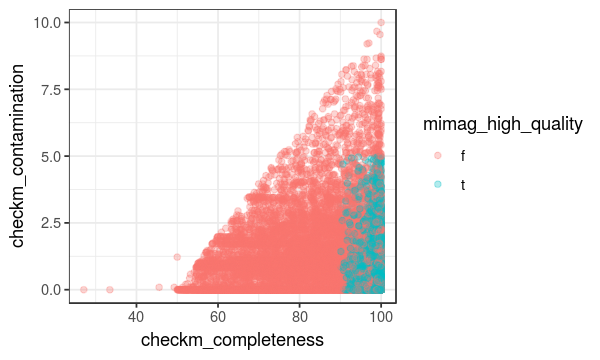

In [37]:
# plotting the association between completeness & contamination
p = df_s_f %>%
    ggplot(aes(checkm_completeness, checkm_contamination, color=mimag_high_quality)) +
    geom_point(alpha=0.3) +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3)
plot(p)

### Assemblies

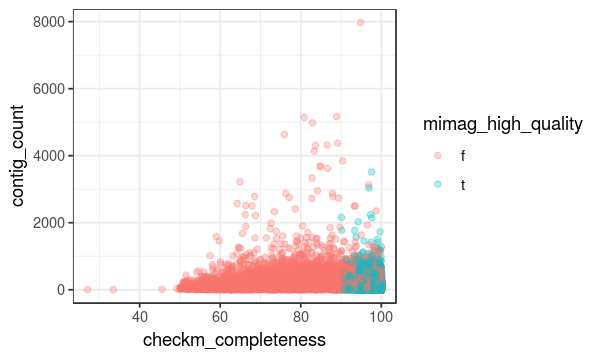

In [38]:
# plotting the association between completeness & contamination
p = df_s_f %>%
    ggplot(aes(checkm_completeness, contig_count, color=mimag_high_quality)) +
    geom_point(alpha=0.3) +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3)
plot(p)

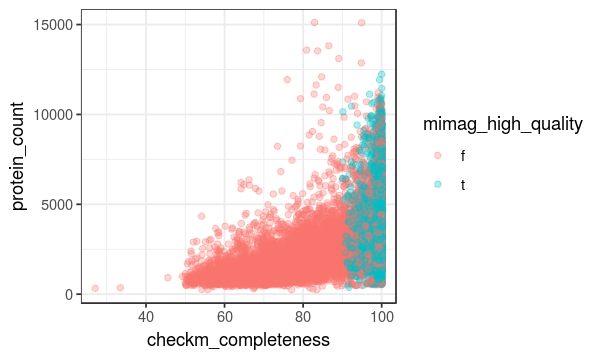

In [39]:
# plotting the association between completeness & contamination
p = df_s_f %>%
    ggplot(aes(checkm_completeness, protein_count, color=mimag_high_quality)) +
    geom_point(alpha=0.3) +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3)
plot(p)

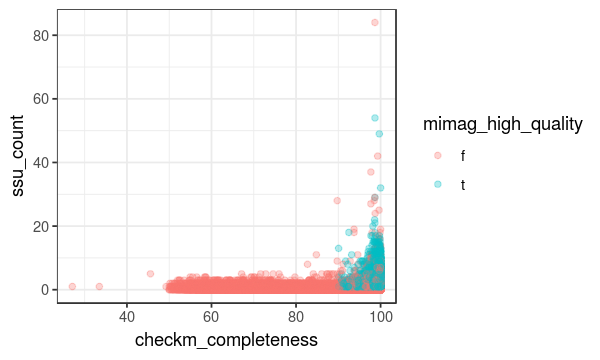

In [40]:
# plotting the association between completeness & contamination
p = df_s_f %>%
    ggplot(aes(checkm_completeness, ssu_count, color=mimag_high_quality)) +
    geom_point(alpha=0.3) +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3)
plot(p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.618   2.000  84.000 


Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 5172 rows containing non-finite values (stat_bin).”

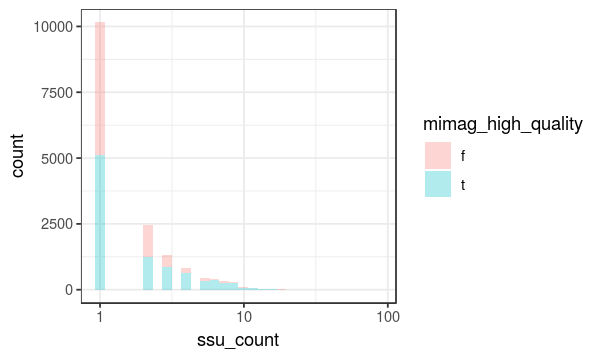

In [53]:
df_s_f$ssu_count %>% summary %>% print

p = df_s_f %>%
    ggplot(aes(ssu_count, fill=mimag_high_quality)) +
    geom_histogram(alpha=0.3) +
    scale_x_log10() +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3)
plot(p)

### Taxonomy

#### Species level

In [41]:
# species level NCBI taxonomy
x = df_s_f %>%
    mutate(SPECIES = gsub('.+;s__', '', ncbi_taxonomy)) %>%
    filter(SPECIES != '') %>%
    .$SPECIES %>% table 

x %>% length %>% print
x %>% sort(decreasing=TRUE) %>% head(n=30)

[1] 8118


.
      [Actinopolyspora] iraqiensis                 [Bacillus] clarkii 
                                 1                                  1 
       [Bacillus] selenitireducens        [Bacteroides] pectinophilus 
                                 1                                  1 
         [Caedibacter] varicaedens         [Clostridium] aerotolerans 
                                 1                                  1 
         [Clostridium] aminophilum          [Clostridium] amygdalinum 
                                 1                                  1 
             [Clostridium] bolteae       [Clostridium] celerecrescens 
                                 1                                  1 
       [Clostridium] cellobioparum       [Clostridium] cellulolyticum 
                                 1                                  1 
           [Clostridium] cellulosi            [Clostridium] citroniae 
                                 1                                  1 
    

In [42]:
# species level GTDB taxonomy
x = df_s_f %>%
    mutate(SPECIES = gsub('.+;s__', '', gtdb_taxonomy)) %>%
    filter(SPECIES != '') %>%
    .$SPECIES %>% table 

x %>% length %>% print
x %>% sort(decreasing=TRUE) %>% head(n=30)

[1] 9688


.
               D2472 sp1              UBA1067 sp1                OM182 sp1 
                      27                       19                       18 
             UBA1033 sp1           GWC1-40-35 sp1           Olegusella sp1 
                      17                       15                       15 
             UBA9973 sp1             UBA9973 sp16           Prevotella sp7 
                      13                       13                       12 
            UBA11703 sp1           GWA1-44-25 sp1             UBA10102 sp1 
                      12                       11                       11 
             UBA8498 sp4              UBA8515 sp1              UBA9934 sp1 
                      11                       11                       11 
             UBA1033 sp2              UBA1539 sp1             UBA11751 sp1 
                      10                       10                        9 
            UBA12044 sp1             UBA12049 sp1             UBA12115 sp1 
          

#### Genus level

In [43]:
# genus level NCBI taxonomy
x = df_s_f %>%
    mutate(GENUS = gsub('.+;g__([^;]*);s__', '\\1', ncbi_taxonomy)) %>%
    filter(GENUS != '') %>%
    .$GENUS %>% table 

x %>% length %>% print
x %>% sort(decreasing=TRUE) %>% head(n=30)

[1] 9087


.
         Streptomyces           Pseudomonas            Prevotella 
                  296                   211                   154 
          Clostridium              Bacillus         Mycobacterium 
                  142                   131                   111 
        Paenibacillus          Sphingomonas             Rhizobium 
                   92                    91                    79 
         Arthrobacter        Microbacterium         Acinetobacter 
                   71                    70                    64 
         Burkholderia        Bradyrhizobium            Catabacter 
                   61                    58                    58 
       Flavobacterium         Synechococcus          Ruminococcus 
                   54                    54                    53 
     Chryseobacterium         Mesorhizobium         Streptococcus 
                   49                    46                    45 
Candidatus Microthrix       Prochlorococcus           Bacter

In [44]:
# genus level NCBI taxonomy
x = df_s_f %>%
    mutate(GENUS = gsub('.+;g__([^;]*);s__', '\\1', gtdb_taxonomy)) %>%
    filter(GENUS != '') %>%
    .$GENUS %>% table 

x %>% length %>% print
x %>% sort(decreasing=TRUE) %>% head(n=30)

[1] 13768


.
    Streptomyces    Pseudomonas_E       Prevotella    Mycobacterium 
             215              158               96               92 
    Sphingomonas   Flavobacterium   Microbacterium    Acinetobacter 
              58               57               52               50 
  Bradyrhizobium    Streptococcus    Paenibacillus              RC9 
              47               43               37               34 
Chryseobacterium        Rhizobium  Synechococcus_C   D2472D2472 sp1 
              33               31               30               27 
   Brevundimonas  Novosphingobium    Psychrobacter        Halomonas 
              26               26               26               25 
          Vibrio  Corynebacterium Sphingobacterium      Rhodococcus 
              25               24               24               23 
Methylobacterium       Variovorax    Kitasatospora    Mesorhizobium 
              22               22               21               21 
     Treponema_D     Butyrivibri

## Writing filtered metadata table

In [45]:
F = file.path(work_dir, 'metadata_1perSpecTaxID.tsv')
write.table(df_s_f, file=F, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release86//metadata_1perSpecTaxID.tsv 


## Filtering by CheckM

In [46]:
# all
df_s_f %>% nrow %>% print

# relaxed
df_s_f %>%
    filter(checkm_completeness >= 50,
           checkm_contamination < 10) %>%
    nrow %>% print

# stringent
df_s_f %>%
    filter(checkm_completeness >= 50,
           checkm_contamination < 5) %>%
    nrow %>% print

[1] 21656
[1] 21651
[1] 21276


#### Writing filtered metadata table

In [47]:
F = file.path(work_dir, 'metadata_1perGTDBSpec_gte50comp-lt5cont.tsv')
df_s_f %>%
    filter(checkm_completeness >= 50,
           checkm_contamination < 5) %>%
    write.table(file=F, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release86//metadata_1perGTDBSpec_gte50comp-lt5cont.tsv 


# Next steps

* llmgp-db
  * `genome_download.R`
    * downloads all genomes based on the assembly accession
    * generates a version of the metadata table that includes the paths to the downloaded genome file
  * ran the LLMGP-DB pipeline on the resulting file

# sessionInfo

In [48]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] curl_3.2         IRkernel_0.8.12  repr_0.15.0      withr_2.1.1     
[21] stringr_1.3.1    grid_3.4.

# debug

In [50]:
# read in table
F = '/ebio/abt3_projects/databases_no-backup/GTDB/release86/metadata_1perGTDBSpec_gte50comp-lt5cont.tsv'
df = read.delim(F, sep='\t')
df %>% nrow %>% print
df %>% head

[1] 21276


ncbi_organism_name,accession,scaffold_count,gc_count,longest_scaffold,gc_percentage,total_gap_length,genome_size,n50_contigs,n50_scaffolds,⋯,ssu_silva_blast_evalue,ssu_silva_blast_perc_identity,lsu_5s_query_id,lsu_5s_length,lsu_5s_contig_len,gtdb_taxonomy,mimag_high_quality,gtdb_cluster_size,gtdb_clustered_genomes,gtdb_type_material
RS_GCF_002009845.1_Leptospira alexanderi,RS_GCF_002009845.1,238,1636040,184955,40.28703,0,4060960,41821,41821,⋯,0,99.734,NZ_JQGW01000083.1,110,79345,d__Bacteria;p__Spirochaetota;c__Leptospirae;o__Leptospirales;f__Leptospiraceae;g__Leptospira;s__Leptospira alexanderi,f,1,RS_GCF_002009845.1,f
RS_GCF_000214495.1_Megasphaera sp. UPII 199-6,RS_GCF_000214495.1,45,760807,149073,46.36845,1,1640787,100595,100595,⋯,0,99.935,NZ_AFIJ01000010.1,109,2931,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Megasphaeraceae;g__28L;s__28L sp1,t,2,RS_GCF_000214495.1;RS_GCF_001553395.1,f
RS_GCF_000221545.1_Megasphaera sp. UPII 135-E,RS_GCF_000221545.1,49,641783,172537,38.88314,8,1650551,64000,64000,⋯,0,99.934,NZ_AFUG01000041.1,108,3222,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Megasphaeraceae;g__28L;s__28L sp2,t,1,RS_GCF_000221545.1,f
RS_GCF_000764165.1_Cryobacterium roopkundense,RS_GCF_000764165.1,226,2844755,132366,65.29437,11,4356826,36861,36861,⋯,0,100,NZ_JPXF01000059.1,109,28349,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Microbacteriaceae;g__Cryobacterium;s__Cryobacterium roopkundense,t,1,RS_GCF_000764165.1,t
RS_GCF_900143645.1_Anaerocolumna xylanovorans DSM 12503,RS_GCF_900143645.1,23,2173871,1427898,40.14312,5024,5420325,343250,343250,⋯,0,99.606,none,none,none,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Anaerocolumna;s__Anaerocolumna xylanovorans,f,1,RS_GCF_900143645.1,t
RS_GCF_900205925.1_Clostridium peptidivorans,RS_GCF_900205925.1,62,1082987,325162,30.72976,0,3524229,133845,133845,⋯,0,99.76,NZ_OAOD01000045.1,111,3094,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Clostridiales;f__Clostridiaceae;g__Clostridium_AK;s__Clostridium_AK peptidivorans,t,1,RS_GCF_900205925.1,f


In [ ]:
# list genome files
P = '/ebio/abt3_projects/databases_no-backup/GTDB/release86/genbank/'
genome_files = list.files(P, pattern='*.fna.gz', recursive=TRUE, full.names=TRUE)
genome_files